In [216]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

## EDA

In [299]:
pd.set_option('display.max_columns', None)

In [300]:
thyroid_df = pd.read_csv('thyroidDF.csv')
thyroid_df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [301]:
thyroid_df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [302]:
thyroid_df.shape

(9172, 31)

In [303]:
thyroid_df["sex"].value_counts()

sex
F    6073
M    2792
Name: count, dtype: int64

In [304]:
thyroid_df["target"].value_counts().sort_index()

target
-      6771
A       147
AK       46
B        21
C         6
C|I      12
D         8
D|R       1
E         1
F       233
FK        6
G       359
GI       10
GK       49
GKJ       1
H|K       8
I       346
J        30
K       436
KJ       11
L       115
LJ        1
M       111
MI        2
MK       16
N       110
O        14
OI        1
P         5
Q        14
R       196
S        85
Name: count, dtype: int64

In [305]:
#classify thyroid conditions as negative, hyperthyroid, or hypothyroid
thyroid_df = thyroid_df[thyroid_df['target'].isin(['-', 'A', 'AK', 'B', 'C', 'C|I', 'D', 'D|R', 'E', 'F', 'FK', 'G', 'GI', 'GK', 'GKJ', 'H', 'H|K'])]
mapping = {'-':'Negative',
           'A':'Hyperthyroid','AK':'Hyperthyroid','B':'Hyperthyroid', 'C':'Hyperthyroid', 'C|I':'Hyperthyroid', 'D':'Hyperthyroid', 'D|R':'Hyperthyroid',
           'E':'Hypothyroid', 'F':'Hypothyroid', 'FK':'Hypothyroid', 'G':'Hypothyroid', 'GI':'Hypothyroid', "GK": 'Hypothyroid',  'GKJ':'Hypothyroid', 'H':'Hypothyroid', 'H|K':'Hypothyroid'
          }
thyroid_df['target'] = thyroid_df['target'].map(mapping)

In [306]:
thyroid_df.shape

(7679, 31)

In [307]:
thyroid_df["target"].value_counts()

target
Negative        6771
Hypothyroid      667
Hyperthyroid     241
Name: count, dtype: int64

In [308]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7679 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7679 non-null   int64  
 1   sex                  7425 non-null   object 
 2   on_thyroxine         7679 non-null   object 
 3   query_on_thyroxine   7679 non-null   object 
 4   on_antithyroid_meds  7679 non-null   object 
 5   sick                 7679 non-null   object 
 6   pregnant             7679 non-null   object 
 7   thyroid_surgery      7679 non-null   object 
 8   I131_treatment       7679 non-null   object 
 9   query_hypothyroid    7679 non-null   object 
 10  query_hyperthyroid   7679 non-null   object 
 11  lithium              7679 non-null   object 
 12  goitre               7679 non-null   object 
 13  tumor                7679 non-null   object 
 14  hypopituitary        7679 non-null   object 
 15  psych                7679 non-null   object

In [309]:
thyroid_df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,7679.000000,6955.000000,5470.000000,7325.000000,6998.000000,7005.000000,259.000000,7.679000e+03
mean,77.640839,5.500684,2.010773,105.497565,0.967297,110.941312,22.955019,8.529532e+08
std,1293.909497,25.978304,0.818738,33.125317,0.164388,37.167537,6.088392,7.556839e+06
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.550000,1.600000,87.000000,0.870000,93.000000,20.000000,8.504100e+08
50%,55.000000,1.400000,1.900000,103.000000,0.960000,108.000000,23.000000,8.510040e+08
75%,67.000000,2.700000,2.300000,121.000000,1.060000,125.000000,27.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,430.000000,2.120000,839.000000,45.000000,8.701190e+08


In [310]:
#check for age outliers
thyroid_df[thyroid_df['age'] > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
2976,455,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.10,t,2.0,t,118.0,t,1.13,t,104.0,f,NaN,SVI,Negative,850530001
5710,65511,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.38,t,2.0,t,113.0,t,1.08,t,104.0,f,NaN,other,Negative,860210008
6392,65512,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,0.03,t,2.8,t,112.0,t,0.84,t,133.0,f,NaN,other,Negative,860403050
8105,65526,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.50,f,NaN,t,132.0,t,1.02,t,129.0,f,NaN,other,Negative,861014041


In [311]:
#check for nulls
null_counts = thyroid_df.isnull().sum()
null_counts

age                       0
sex                     254
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     724
T3_measured               0
T3                     2209
TT4_measured              0
TT4                     354
T4U_measured              0
T4U                     681
FTI_measured              0
FTI                     674
TBG_measured              0
TBG                    7420
referral_source           0
target                    0
patient_id                0
dtype: int64

In [312]:
#drop columns not useful for analysis
thyroid_df = thyroid_df.drop(columns = ['hypopituitary', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'TBG', 'patient_id', 'referral_source'])

In [313]:
#drop age outliers
thyroid_df = thyroid_df[thyroid_df['age'] <= 100]
thyroid_df.shape

(7675, 21)

In [314]:
#drop nulls
thyroid_df = thyroid_df.dropna()
thyroid_df.shape

(4778, 21)

In [315]:
thyroid_df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,target
19,36,F,f,f,f,f,f,f,f,t,t,f,f,f,f,1.50,2.4,90.0,1.06,85.0,Negative
21,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,1.20,2.3,104.0,1.08,96.0,Negative
22,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,5.90,2.1,88.0,0.84,105.0,Negative
23,77,F,f,f,f,f,f,f,f,f,f,f,f,f,f,0.05,2.4,107.0,1.13,95.0,Negative
27,51,F,f,f,f,f,f,f,f,f,f,f,f,f,f,0.05,2.1,93.0,0.87,106.0,Negative


In [317]:
# replacing boolean columns with 0 and 1
from sklearn.preprocessing import LabelEncoder


label_encoder=LabelEncoder()
for x in thyroid_df.columns[1:20]:
    thyroid_df[x]=label_encoder.fit_transform(thyroid_df[x])
    #print(x)
    
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4778 entries, 19 to 9141
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4778 non-null   int64 
 1   sex                  4778 non-null   int64 
 2   on_thyroxine         4778 non-null   int64 
 3   query_on_thyroxine   4778 non-null   int64 
 4   on_antithyroid_meds  4778 non-null   int64 
 5   sick                 4778 non-null   int64 
 6   pregnant             4778 non-null   int64 
 7   thyroid_surgery      4778 non-null   int64 
 8   I131_treatment       4778 non-null   int64 
 9   query_hypothyroid    4778 non-null   int64 
 10  query_hyperthyroid   4778 non-null   int64 
 11  lithium              4778 non-null   int64 
 12  goitre               4778 non-null   int64 
 13  tumor                4778 non-null   int64 
 14  psych                4778 non-null   int64 
 15  TSH                  4778 non-null   int64 
 16  T3        

In [318]:
thyroid_df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,target
19,36,0,0,0,0,0,0,0,0,1,1,0,0,0,0,121,25,94,62,98,Negative
21,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,24,108,64,109,Negative
22,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,22,92,39,118,Negative
23,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,25,111,69,108,Negative
27,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,22,97,42,119,Negative


In [319]:
negative_samples = thyroid_df[thyroid_df["target"] == 'Negative']
hypothyroid_samples = thyroid_df[thyroid_df["target"] == 'Hypothyroid']
hyperthyroid_samples = thyroid_df[thyroid_df["target"] == 'Hyperthyroid']

In [320]:
#balance out negative class
negative_samples_balanced = negative_samples.sample(n=1000, random_state=42)
thyroid_df = pd.concat([negative_samples_balanced, hypothyroid_samples, hyperthyroid_samples], ignore_index=True)


In [325]:
thyroid_df.shape

(1613, 21)

In [321]:
thyroid_df["target"].value_counts()

target
Negative        1000
Hypothyroid      444
Hyperthyroid     169
Name: count, dtype: int64

In [322]:
thyroid_df["sex"].value_counts()

sex
0    1113
1     500
Name: count, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'on_thyroxine'}>,
        <AxesSubplot:title={'center':'query_on_thyroxine'}>],
       [<AxesSubplot:title={'center':'on_antithyroid_meds'}>,
        <AxesSubplot:title={'center':'sick'}>,
        <AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid_surgery'}>],
       [<AxesSubplot:title={'center':'I131_treatment'}>,
        <AxesSubplot:title={'center':'query_hypothyroid'}>,
        <AxesSubplot:title={'center':'query_hyperthyroid'}>,
        <AxesSubplot:title={'center':'lithium'}>],
       [<AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>,
        <AxesSubplot:title={'center':'psych'}>,
        <AxesSubplot:title={'center':'TSH'}>],
       [<AxesSubplot:title={'center':'T3'}>,
        <AxesSubplot:title={'center':'TT4'}>,
        <AxesSubplot:title={'center':'T4U'}>,
        <AxesS

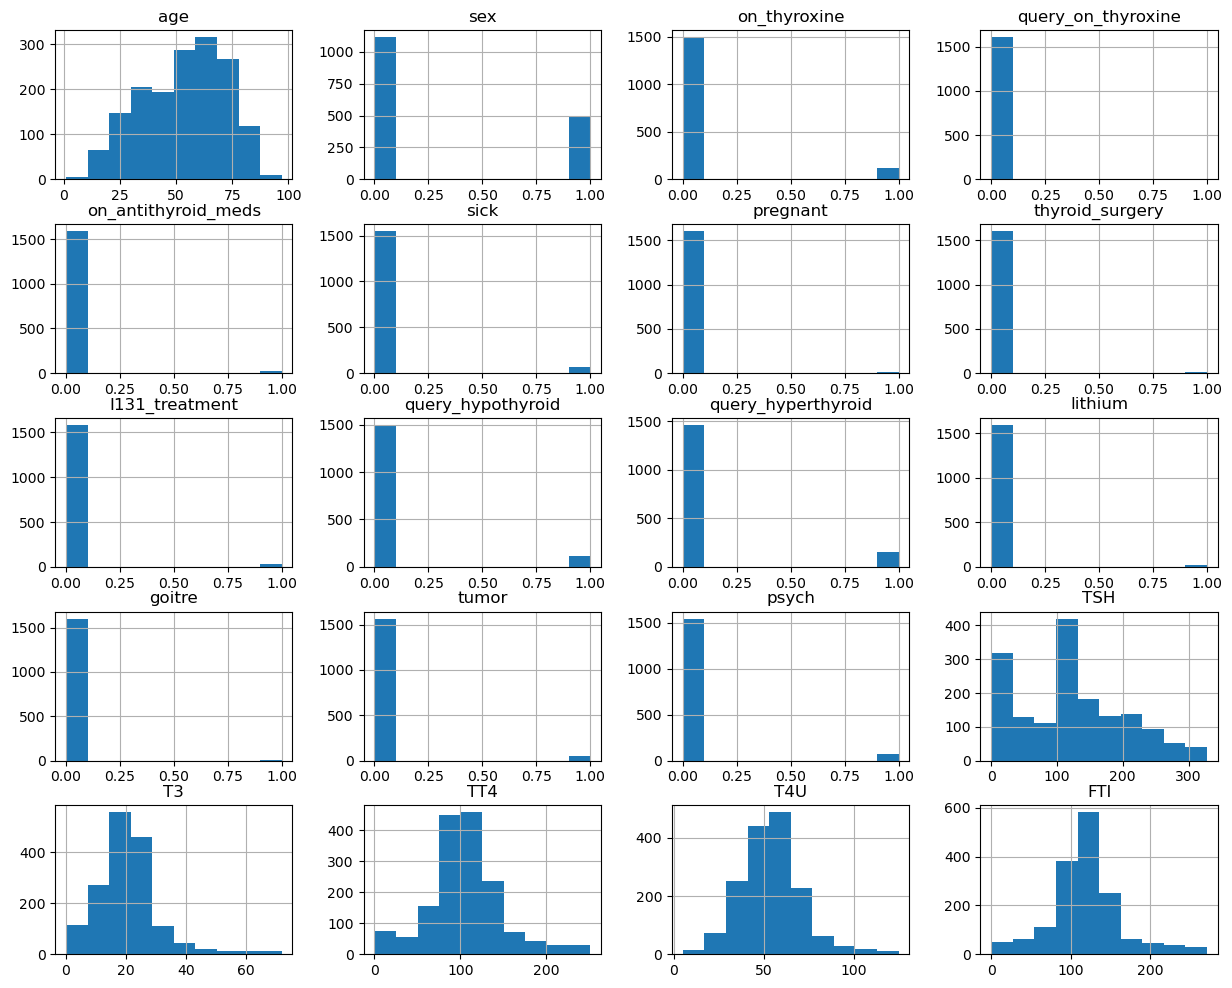

In [323]:
thyroid_df.hist(figsize=(15,12))

In [324]:
thyroid_df.to_csv('thyroidDF_cleaned.csv', index=False)

In [296]:
X = thyroid_df.drop(columns=['target'])
y = thyroid_df['target']

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [291]:
X_train.shape

(1129, 20)

In [292]:
X_test.shape

(484, 20)

## Random Forest Classifier - Base Model

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [182]:
y_pred = rf_model.predict(X_test)
y_pred

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Hyperthyroid', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Hypothyroid', 'Hypothyroid',
       'Hypothyroid', 'Hypothyroid', 'Negative', 'Negative', 'Negative',
       'Negative', 'Hypothyroid', 'Hypothyroid', 'Negative', 'Negative',
       'Hypothyroid', 'Hyperthyroid', 'Negative', 'Negative', 'Negative',
       'Hypothyroid', 'Hypothyroid', 'Negative', 'Negative', 'Negative',
       'Negative', 'Hypothyroid', 'Hypothyroid', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Hypothyroid', 'Negative', 'Hypothyroid', 'Negative', 'Negative',
       'Negative', 'Negative', 'Hypothyroid', 'Negative', 'Hypothyroid',
       'Negative', 'Hypothyroid', 'Negative', 'Negative', 'Hypothyroid',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
   

In [183]:
y_pred_proba = rf_model.predict_proba(X_test)
y_pred_proba 

array([[0.14, 0.  , 0.86],
       [0.32, 0.06, 0.62],
       [0.03, 0.32, 0.65],
       ...,
       [0.  , 0.01, 0.99],
       [0.  , 0.94, 0.06],
       [0.  , 0.96, 0.04]])

In [184]:
from sklearn.metrics import confusion_matrix, classification_report

In [185]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 38   1   9]
 [  0 129   0]
 [  2   3 302]]


In [186]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

Hyperthyroid       0.95      0.79      0.86        48
 Hypothyroid       0.97      1.00      0.98       129
    Negative       0.97      0.98      0.98       307

    accuracy                           0.97       484
   macro avg       0.96      0.93      0.94       484
weighted avg       0.97      0.97      0.97       484



In [187]:
# Predict on train data
y_pred_train = rf_model.predict(X_train)

class_report_train = classification_report(y_train, y_pred_train)
print("Classification Report for Train Data: \n", class_report_train)

Classification Report for Train Data: 
               precision    recall  f1-score   support

Hyperthyroid       1.00      1.00      1.00       121
 Hypothyroid       1.00      1.00      1.00       315
    Negative       1.00      1.00      1.00       693

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



In [188]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for Train Data: \n", confusion_matrix_train)

Confusion Matrix for Train Data: 
 [[121   0   0]
 [  0 315   0]
 [  0   0 693]]


In [189]:
feature_importances = rf_model.feature_importances_

# Get indices of top 5 features
top5_indices = feature_importances.argsort()[-5:][::-1]

# Get top 5 feature names
top5_features = X_train.columns[top5_indices]

print("Top 5 Features:")
for feature in top5_features:
    print(feature)

Top 5 Features:
TSH
FTI
TT4
T3
T4U


## LinearSVM Classifier

In [190]:
from sklearn.svm import LinearSVC

In [191]:
svc_classifier = LinearSVC(random_state=42)  # Using default parameters
svc_classifier.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [192]:
# Predict on test data
y_pred = svc_classifier.predict(X_test)
y_pred

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Hyperthyroid', 'Negative', 'Negative', 'Negative',
       'Hypothyroid', 'Hyperthyroid', 'Hyperthyroid', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Hypothyroid',
       'Hypothyroid', 'Hypothyroid', 'Hypothyroid', 'Negative',
       'Negative', 'Negative', 'Negative', 'Hypothyroid', 'Hypothyroid',
       'Negative', 'Negative', 'Hypothyroid', 'Hyperthyroid',
       'Hyperthyroid', 'Negative', 'Negative', 'Hypothyroid',
       'Hypothyroid', 'Negative', 'Hypothyroid', 'Hyperthyroid',
       'Negative', 'Hypothyroid', 'Hypothyroid', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Hyperthyroid', 'Negative',
       'Hypothyroid', 'Hyperthyroid', 'Hypothyroid', 'Hyperthyroid',
       'Negative', 'Hypothyroid', 'Negative', 'Hypothyroid', 'Negative',
       'Hypothyroid', 'Negative', 'Hypothyroid', 'Hyperthyroid',
       'Negative', 'Hypothyroid', 'Negative', 'Ne

In [193]:
conf_matrix_svc = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix_svc)

Confusion Matrix: 
 [[ 41   0   7]
 [  0 128   1]
 [ 37  41 229]]


In [194]:
class_report_svc = classification_report(y_test, y_pred)
print("Classification Report: \n", class_report_svc)

Classification Report: 
               precision    recall  f1-score   support

Hyperthyroid       0.53      0.85      0.65        48
 Hypothyroid       0.76      0.99      0.86       129
    Negative       0.97      0.75      0.84       307

    accuracy                           0.82       484
   macro avg       0.75      0.86      0.78       484
weighted avg       0.87      0.82      0.83       484



In [195]:
# Predict on train data
y_train_pred = svc_classifier.predict(X_train)

class_report_train_svc = classification_report(y_train, y_train_pred)
print("Classification Report for Train Data: \n", class_report_train_svc)

Classification Report for Train Data: 
               precision    recall  f1-score   support

Hyperthyroid       0.61      0.93      0.74       121
 Hypothyroid       0.77      0.99      0.86       315
    Negative       0.98      0.76      0.85       693

    accuracy                           0.84      1129
   macro avg       0.78      0.89      0.82      1129
weighted avg       0.88      0.84      0.84      1129



In [196]:
confusion_matrix_train_svc = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Train Data: \n", confusion_matrix_train_svc)

Confusion Matrix for Train Data: 
 [[113   0   8]
 [  0 313   2]
 [ 73  96 524]]


In [197]:
from sklearn.metrics import f1_score
f1_scores_train = f1_score(y_train, y_train_pred, average=None)
f1_scores_test = f1_score(y_test, y_pred, average=None)

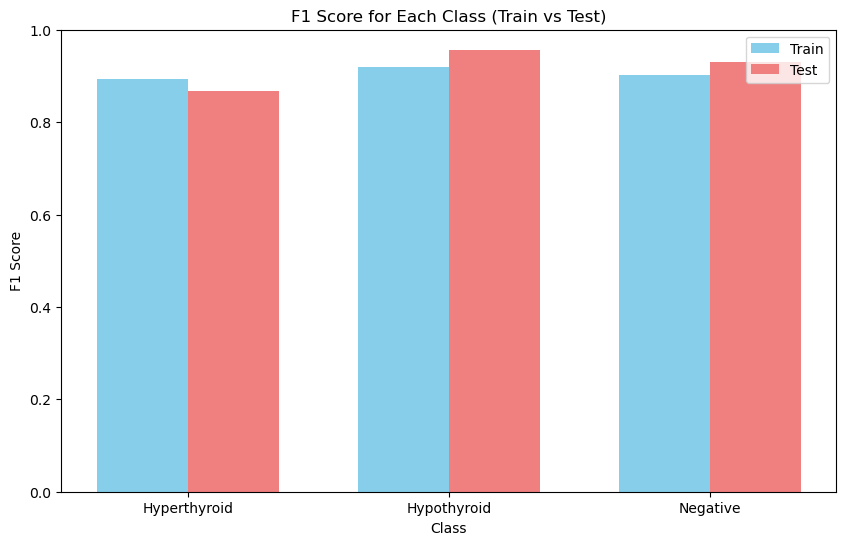

In [161]:
classes = np.unique(y)
bar_width = 0.35
index = np.arange(len(classes))

plt.figure(figsize=(10, 6))

plt.bar(index, f1_scores_train, bar_width, label='Train', color='skyblue')
plt.bar(index + bar_width, f1_scores_test, bar_width, label='Test', color='lightcoral')

plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class (Train vs Test)')
plt.xticks(index + bar_width / 2, classes)
plt.ylim(0, 1)
plt.legend()

plt.show()

## SVM with poly kernel

In [162]:
from sklearn.svm import SVC

In [163]:
svc_classifier_poly = SVC(kernel='poly', random_state=42)
svc_classifier_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [164]:
# Predict on test data
y_pred = svc_classifier_poly.predict(X_test)
y_pred

array(['Hypothyroid', 'Negative', 'Hyperthyroid', 'Hypothyroid',
       'Negative', 'Hypothyroid', 'Hyperthyroid', 'Negative', 'Negative',
       'Hyperthyroid', 'Hypothyroid', 'Negative', 'Hyperthyroid',
       'Hypothyroid', 'Hypothyroid', 'Hypothyroid', 'Hypothyroid',
       'Negative', 'Negative', 'Hypothyroid', 'Negative', 'Negative',
       'Hypothyroid', 'Negative', 'Negative', 'Hypothyroid',
       'Hyperthyroid', 'Hypothyroid', 'Negative', 'Hypothyroid',
       'Negative', 'Hypothyroid', 'Hypothyroid', 'Hypothyroid',
       'Hypothyroid', 'Negative', 'Negative', 'Hypothyroid',
       'Hypothyroid', 'Hypothyroid', 'Negative', 'Negative',
       'Hyperthyroid', 'Hypothyroid', 'Hypothyroid', 'Hypothyroid',
       'Hypothyroid', 'Hyperthyroid', 'Negative', 'Hypothyroid',
       'Negative', 'Hypothyroid', 'Negative', 'Negative', 'Negative',
       'Hypothyroid', 'Hypothyroid', 'Negative', 'Hypothyroid',
       'Hypothyroid', 'Negative', 'Hyperthyroid', 'Hyperthyroid',
       'Hyper

In [165]:
conf_matrix_svc_poly = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix_svc_poly)

Confusion Matrix: 
 [[ 38   1  10]
 [  0 129   2]
 [  1   6 147]]


In [166]:
class_report_svc_poly = classification_report(y_test, y_pred)
print("Classification Report: \n", class_report_svc_poly)

Classification Report: 
               precision    recall  f1-score   support

Hyperthyroid       0.97      0.78      0.86        49
 Hypothyroid       0.95      0.98      0.97       131
    Negative       0.92      0.95      0.94       154

    accuracy                           0.94       334
   macro avg       0.95      0.90      0.92       334
weighted avg       0.94      0.94      0.94       334



In [167]:
# Predict on train data
y_train_pred = svc_classifier_poly.predict(X_train)

class_report_train_svc_poly = classification_report(y_train, y_train_pred)
print("Classification Report for Train Data: \n", class_report_train_svc_poly)

Classification Report for Train Data: 
               precision    recall  f1-score   support

Hyperthyroid       0.96      0.85      0.90       120
 Hypothyroid       0.98      0.99      0.98       313
    Negative       0.94      0.97      0.95       346

    accuracy                           0.96       779
   macro avg       0.96      0.94      0.95       779
weighted avg       0.96      0.96      0.96       779



In [168]:
confusion_matrix_train_svc_poly = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Train Data: \n", confusion_matrix_train_svc_poly)

Confusion Matrix for Train Data: 
 [[102   0  18]
 [  0 309   4]
 [  4   6 336]]


In [169]:
f1_scores_train = f1_score(y_train, y_train_pred, average=None)
f1_scores_test = f1_score(y_test, y_pred, average=None)

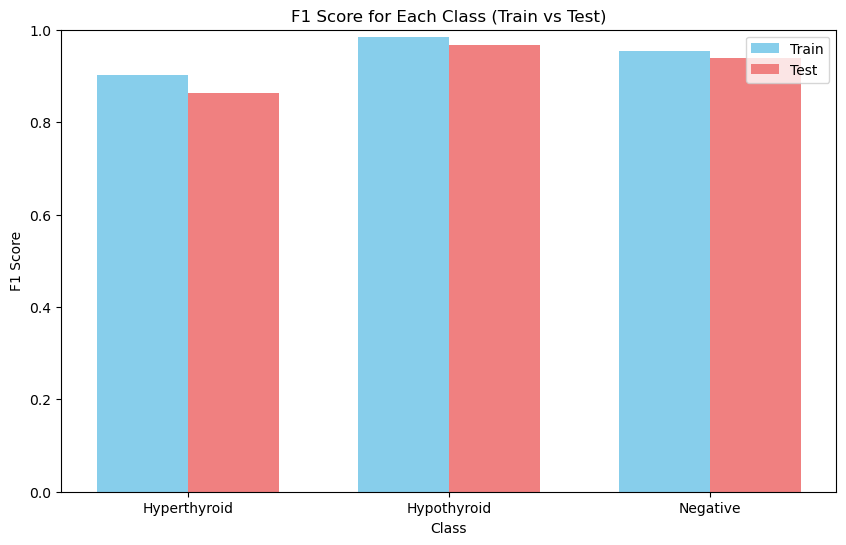

In [170]:
classes = np.unique(y)
bar_width = 0.35
index = np.arange(len(classes))

plt.figure(figsize=(10, 6))

plt.bar(index, f1_scores_train, bar_width, label='Train', color='skyblue')
plt.bar(index + bar_width, f1_scores_test, bar_width, label='Test', color='lightcoral')

plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class (Train vs Test)')
plt.xticks(index + bar_width / 2, classes)
plt.ylim(0, 1)
plt.legend()

plt.show()

## SVM with RBF kernel

In [127]:
svc_classifier_rbf = SVC(kernel='rbf', random_state=42)
svc_classifier_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [128]:
# Predict on test data
y_pred = svc_classifier_rbf.predict(X_test)
y_pred

array(['Negative', 'Hyperthyroid', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Hyperthyroid', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Hypothyroid', 'Hypothyroid',
       'Hypothyroid', 'Hypothyroid', 'Negative', 'Negative', 'Negative',
       'Negative', 'Hypothyroid', 'Hypothyroid', 'Negative', 'Negative',
       'Hypothyroid', 'Hyperthyroid', 'Negative', 'Negative', 'Negative',
       'Hypothyroid', 'Hypothyroid', 'Negative', 'Negative', 'Negative',
       'Negative', 'Hypothyroid', 'Hypothyroid', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Hypothyroid', 'Negative', 'Hypothyroid', 'Negative', 'Negative',
       'Negative', 'Negative', 'Hypothyroid', 'Negative', 'Hypothyroid',
       'Negative', 'Hypothyroid', 'Negative', 'Negative', 'Hypothyroid',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',

In [129]:
conf_matrix_svc_rbf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix_svc_rbf)

Confusion Matrix: 
 [[ 33   1  14]
 [  0 128   1]
 [  4   4 299]]


In [130]:
class_report_svc_rbf = classification_report(y_test, y_pred)
print("Classification Report: \n", class_report_svc_rbf)

Classification Report: 
               precision    recall  f1-score   support

Hyperthyroid       0.89      0.69      0.78        48
 Hypothyroid       0.96      0.99      0.98       129
    Negative       0.95      0.97      0.96       307

    accuracy                           0.95       484
   macro avg       0.94      0.88      0.91       484
weighted avg       0.95      0.95      0.95       484



In [131]:
# Predict on train data
y_train_pred = svc_classifier_rbf.predict(X_train)

class_report_train_svc_rbf = classification_report(y_train, y_train_pred)
print("Classification Report for Train Data: \n", class_report_train_svc_rbf)

Classification Report for Train Data: 
               precision    recall  f1-score   support

Hyperthyroid       0.94      0.86      0.90       121
 Hypothyroid       0.97      0.98      0.97       315
    Negative       0.97      0.98      0.97       693

    accuracy                           0.96      1129
   macro avg       0.96      0.94      0.95      1129
weighted avg       0.96      0.96      0.96      1129



In [132]:
confusion_matrix_train_svc_poly = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Train Data: \n", confusion_matrix_train_svc_poly)

Confusion Matrix for Train Data: 
 [[104   0  17]
 [  0 309   6]
 [  7  10 676]]


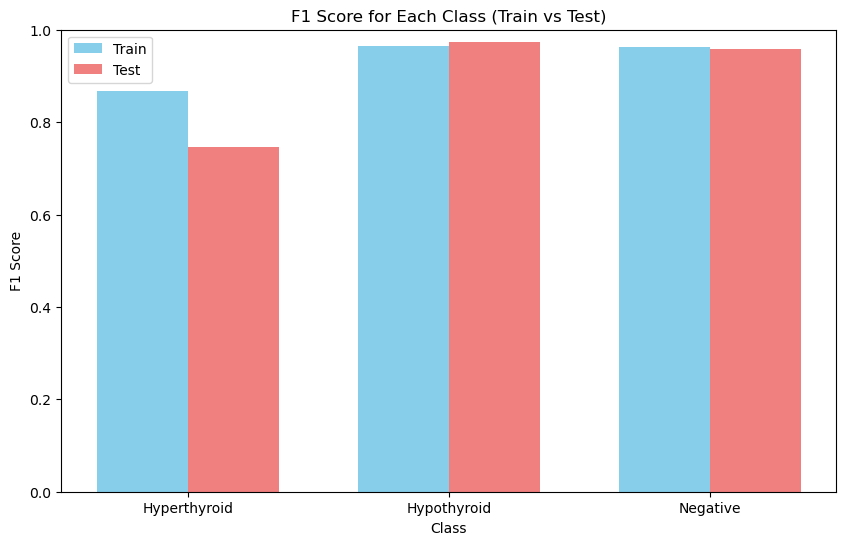

In [133]:
classes = np.unique(y)
bar_width = 0.35
index = np.arange(len(classes))

plt.figure(figsize=(10, 6))

plt.bar(index, f1_scores_train, bar_width, label='Train', color='skyblue')
plt.bar(index + bar_width, f1_scores_test, bar_width, label='Test', color='lightcoral')

plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class (Train vs Test)')
plt.xticks(index + bar_width / 2, classes)
plt.ylim(0, 1)
plt.legend()

plt.show()

## 5. XGBoost - RandomizedSearchCV

In [253]:
# Encode target variable
label_encoder = LabelEncoder()
thyroid_df['target'] = label_encoder.fit_transform(thyroid_df['target'])

In [254]:
thyroid_df['target'].value_counts()

target
2    1000
1     444
0     169
Name: count, dtype: int64

In [255]:
y = thyroid_df['target']

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [202]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [203]:
xgb_model = XGBClassifier(objective = 'multi:softmax', random_state=42)

In [204]:
param_dist = {
    'n_estimators': range(100, 1001, 50),
    'learning_rate': [0.1 * i for i in range(1, 17)],
    'max_depth': [1, 2],
    'gamma': [0.0] + [0.25 * i for i in range(1, 21)]
}

In [205]:
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)

In [206]:
random_search.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.25, 0.5, 0.75, 1.0,
                   

In [207]:
random_search.best_params_

{'n_estimators': 800, 'max_depth': 2, 'learning_rate': 1.1, 'gamma': 0.5}

In [208]:
best_model_xgb = random_search.best_estimator_

In [209]:
y_pred_xgb = best_model_xgb.predict(X_test)
y_pred_proba_xgb = best_model_xgb.predict_proba(X_test)

In [210]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGBoost:")
print(conf_matrix_xgb)

Confusion Matrix for XGBoost:
[[ 39   1   8]
 [  0 128   1]
 [  3   3 301]]


In [211]:
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report for XGBoost:")
print(class_report_xgb)

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        48
           1       0.97      0.99      0.98       129
           2       0.97      0.98      0.98       307

    accuracy                           0.97       484
   macro avg       0.96      0.93      0.94       484
weighted avg       0.97      0.97      0.97       484



In [212]:
y_train_pred_xgb = best_model_xgb.predict(X_train)

# Calculate classification report for train data
train_class_report_xgb = classification_report(y_train, y_train_pred_xgb)
print("Classification Report for Train Data for XGBoost:")
print(train_class_report_xgb)

Classification Report for Train Data for XGBoost:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       121
           1       0.99      1.00      1.00       315
           2       1.00      0.99      0.99       693

    accuracy                           0.99      1129
   macro avg       0.98      1.00      0.99      1129
weighted avg       0.99      0.99      0.99      1129



In [213]:
# Get feature importances from the best model
feature_importances_xgb = best_model_xgb.feature_importances_

# Get indices of top 5 features
top5_indices_xgb = feature_importances_xgb.argsort()[-5:][::-1]

# Get top 5 feature names
top5_features_xgb = X_train.columns[top5_indices_xgb]

print("Top 5 Features for XGBoost:")
for feature in top5_features_xgb:
    print(feature)

Top 5 Features for XGBoost:
TSH
FTI
T3
TT4
tumor


## Neural Network

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# # Define the neural network model
# model = Sequential()
# model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(y_train.shape[1], activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])